## Temporary notebook to test and create functions for creating dummy data and labels

In [35]:
import numpy as np   
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, rfft, rfftfreq, irfft

def generate_sine_wave(frequency, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    y = np.sin((2 * np.pi) * x * frequency)
    return x, y

sample_rate = 2048  # Hertz

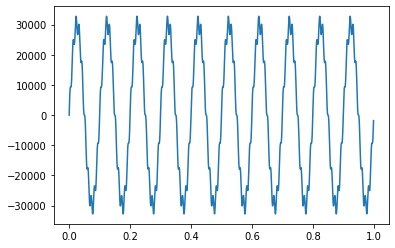

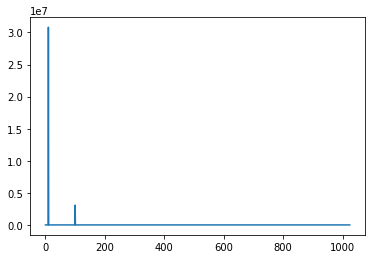

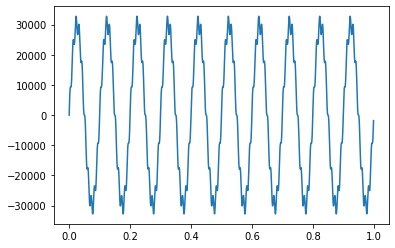

In [43]:
frequency = 10 # 1/Seconds
duration = 1  # Seconds

x, y = generate_sine_wave(frequency, sample_rate, duration)
# //plt.plot(x, y)

_, signal = generate_sine_wave(frequency, sample_rate, duration)
_, noise = generate_sine_wave(frequency*10, sample_rate, duration)

mixed_tone = signal + noise * 0.1

normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

time = np.arange(len(normalized_tone)) / sample_rate

plt.plot(time, normalized_tone[:])
plt.show()

N = sample_rate * duration

yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / sample_rate)

plt.plot(xf, np.abs(yf))
plt.show()

new_sig = irfft(yf)

plt.plot(time, new_sig)
plt.show()